In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import json
import seaborn as sns
from collections import Counter

In [2]:
os.chdir('/shared/0/projects/research-jam-summer-2024')

In [3]:
df = pd.read_json('data/regression_100k_data/merged_metrics_with_dicts_397k.jsonl', orient='records', lines=True)

In [4]:
df.shape

(397174, 136)

In [5]:
df.columns

Index(['agg_lexical', 'agg_orthographic', 'agg_semantic', 'agg_style',
       'agg_syntactic', 'conversation_hash', 'hashed_ip', 'metric_bleu',
       'metric_capitalization', 'metric_contract_count',
       ...
       'category_5', 'category_6', 'category_7', 'category_8', 'category_9',
       'category_10', 'category_11', 'category_12', 'category_13',
       'category_14'],
      dtype='object', length=136)

In [6]:
Counter(df['human_turn_1_topic'].apply(lambda x: round(sum(x),4) if x!=None else 0))

Counter({1.0: 397155, 0.0: 19})

In [7]:
from copy import deepcopy
df1 = deepcopy(df)

In [8]:
url = "https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv"
country_region = pd.read_csv(url)
country_region.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [9]:
import re
country_region.name = country_region.name.apply(lambda x: re.sub(',.*','',x))

In [10]:
country_region.loc[country_region['alpha-2']=='KP','name'] = 'South Korea'
country_region.loc[country_region['alpha-2']=='CD','name'] = 'DR Congo'

In [11]:
country_region.loc[country_region['name']=='Taiwan','region'] = 'Asia'
country_region.loc[country_region['name']=='Taiwan','sub-region'] = 'Eastern Asia'

In [12]:
df1.country = df1.country.replace({'United States':'United States of America',
                                   'Russia':'Russian Federation',
                                   'United Kingdom': 'United Kingdom of Great Britain and Northern Ireland',
                                   'The Netherlands': 'Netherlands',
                                   'Vietnam': 'Viet Nam',
                                   'Syria': 'Syrian Arab Republic',
                                   'Laos': "Lao People's Democratic Republic"})

In [13]:
df1 = df1.merge(country_region[['name','sub-region','region']], 
                left_on='country', right_on='name', how='left')
df1.loc[df1.country=='Kosovo','region'] = 'Europe'
df1.loc[df1.country=='Kosovo','sub-region'] = 'Southern Europe'
df1.loc[df1.country=='United States of America','sub-region'] = 'United States'
df1.loc[df1.country=='United States of America','region'] = 'United States'
df1 = df1.drop(['name','country','region'], axis=1)


In [14]:
Counter(df1['sub-region'])

Counter({'United States': 102739,
         'Eastern Europe': 49464,
         'Northern Europe': 37819,
         'Western Europe': 34883,
         'Eastern Asia': 28978,
         'Southern Asia': 28108,
         'South-eastern Asia': 22353,
         'Western Asia': 18670,
         'Northern Africa': 15382,
         'Australia and New Zealand': 14748,
         'Northern America': 12265,
         'Southern Europe': 10984,
         'Latin America and the Caribbean': 10243,
         'Sub-Saharan Africa': 8058,
         'Central Asia': 1787,
         nan: 463,
         'Melanesia': 208,
         'Polynesia': 22})

In [15]:
df1.loc[df1['sub-region']=='Polynesia','sub-region'] = 'Melanesia'

In [16]:
Counter(df1['sub-region'])

Counter({'United States': 102739,
         'Eastern Europe': 49464,
         'Northern Europe': 37819,
         'Western Europe': 34883,
         'Eastern Asia': 28978,
         'Southern Asia': 28108,
         'South-eastern Asia': 22353,
         'Western Asia': 18670,
         'Northern Africa': 15382,
         'Australia and New Zealand': 14748,
         'Northern America': 12265,
         'Southern Europe': 10984,
         'Latin America and the Caribbean': 10243,
         'Sub-Saharan Africa': 8058,
         'Central Asia': 1787,
         nan: 463,
         'Melanesia': 230})

In [17]:
df1 = df1.rename(columns={'sub-region':'subregion'})

In [18]:
# df_final = pd.concat((df_final,
#                       pd.get_dummies(df_final['lda'], drop_first=True)), axis=1).drop(['lda'], axis=1)
# df_final.columns

In [19]:
# df_final = pd.concat((df_final,
#                       pd.get_dummies(df_final['category'], drop_first=True)), axis=1).drop(['category'], axis=1)
# df_final.columns

In [20]:
df1 = df1.loc[:,~df1.columns.str.startswith('agg_')]
df1 = df1.loc[:,~df1.columns.str.startswith('metric_')]
df1.columns

Index(['conversation_hash', 'hashed_ip', 'llm_model', 'overall_score',
       'prompt', 'model', 'language', 'turn', 'toxic', 'topic0',
       ...
       'category_6', 'category_7', 'category_8', 'category_9', 'category_10',
       'category_11', 'category_12', 'category_13', 'category_14',
       'subregion'],
      dtype='object', length=107)

In [21]:
df1 = df1.drop(['conversation_hash', 'hashed_ip', 'language',
                  'human_turn_1_liwc', 'human_turn_1_pos', 'human_turn_1_punctuation','human_turn_1_topic',
                  'ai_turn_2_liwc', 'ai_turn_2_pos', 'ai_turn_2_punctuation','ai_turn_2_topic'], axis=1)
df1.columns

Index(['llm_model', 'overall_score', 'prompt', 'model', 'turn', 'toxic',
       'topic0', 'topic1', 'topic2', 'topic3', 'topic4', 'topic5', 'topic6',
       'topic7', 'topic8', 'topic9', 'topic10', 'topic11', 'topic12',
       'topic13', 'topic14', 'topic15', 'topic16', 'topic17', 'topic18',
       'topic19', 'topic20', 'topic21', 'topic22', 'topic23', 'topic24',
       'topic25', 'topic26', 'topic27', 'topic28', 'topic29', 'topic30',
       'topic31', 'topic32', 'topic33', 'topic34', 'topic35', 'topic36',
       'topic37', 'topic38', 'topic39', 'topic40', 'topic41', 'topic42',
       'topic43', 'topic44', 'topic45', 'topic46', 'topic47', 'topic48',
       'topic49', 'ai_turn_2_capitalization', 'ai_turn_2_contract_count',
       'ai_turn_2_formality', 'ai_turn_2_log_word_count',
       'ai_turn_2_perplexity', 'ai_turn_2_politeness', 'ai_turn_2_readability',
       'ai_turn_2_sentiment', 'ai_turn_2_subjectivity', 'ai_turn_2_toxicity',
       'ai_turn_2_typo', 'ai_turn_2_word_length',
  

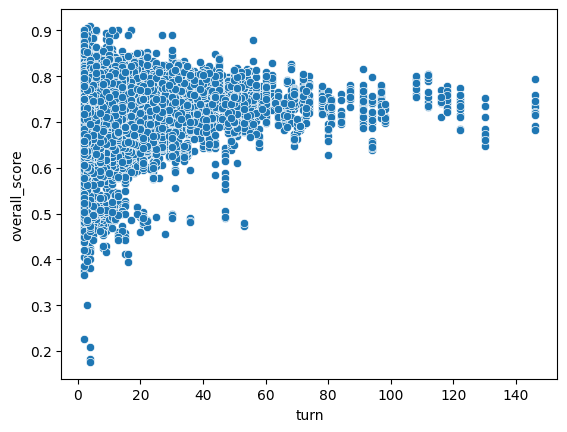

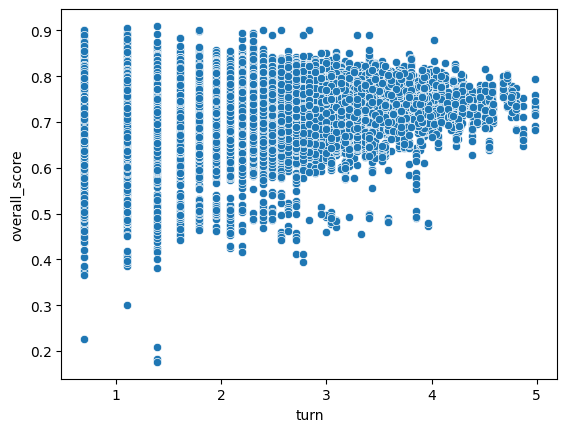

In [22]:
#no need to log-scale turn

sns.scatterplot(x = df1['turn'], y = df1['overall_score'])
plt.show()

sns.scatterplot(x = np.log(df1['turn']), y = df1['overall_score'])
plt.show()

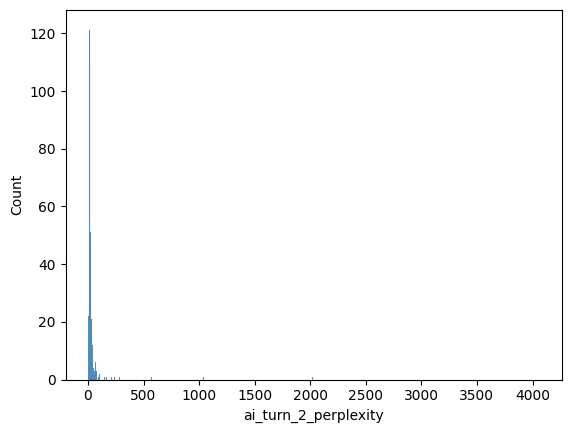

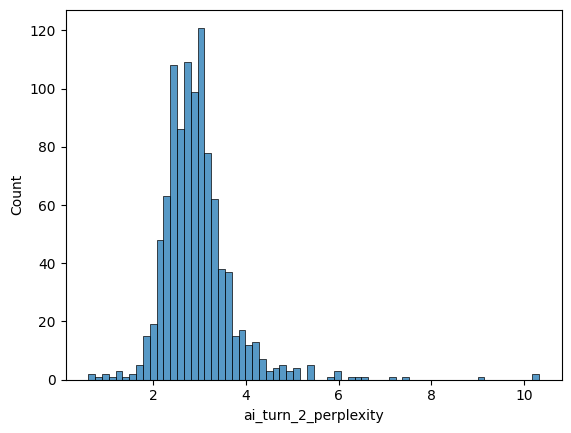

In [23]:
sns.histplot(df1['ai_turn_2_perplexity'].sample(1000))
plt.show()
sns.histplot(np.log(df1['ai_turn_2_perplexity'].sample(1000)))
plt.show()

In [24]:
df1['human_turn_1_perplexity'] = np.log(df1['human_turn_1_perplexity'])
df1['ai_turn_2_perplexity'] = np.log(df1['ai_turn_2_perplexity'])

In [25]:
df1.columns.tolist()

['llm_model',
 'overall_score',
 'prompt',
 'model',
 'turn',
 'toxic',
 'topic0',
 'topic1',
 'topic2',
 'topic3',
 'topic4',
 'topic5',
 'topic6',
 'topic7',
 'topic8',
 'topic9',
 'topic10',
 'topic11',
 'topic12',
 'topic13',
 'topic14',
 'topic15',
 'topic16',
 'topic17',
 'topic18',
 'topic19',
 'topic20',
 'topic21',
 'topic22',
 'topic23',
 'topic24',
 'topic25',
 'topic26',
 'topic27',
 'topic28',
 'topic29',
 'topic30',
 'topic31',
 'topic32',
 'topic33',
 'topic34',
 'topic35',
 'topic36',
 'topic37',
 'topic38',
 'topic39',
 'topic40',
 'topic41',
 'topic42',
 'topic43',
 'topic44',
 'topic45',
 'topic46',
 'topic47',
 'topic48',
 'topic49',
 'ai_turn_2_capitalization',
 'ai_turn_2_contract_count',
 'ai_turn_2_formality',
 'ai_turn_2_log_word_count',
 'ai_turn_2_perplexity',
 'ai_turn_2_politeness',
 'ai_turn_2_readability',
 'ai_turn_2_sentiment',
 'ai_turn_2_subjectivity',
 'ai_turn_2_toxicity',
 'ai_turn_2_typo',
 'ai_turn_2_word_length',
 'human_turn_1_capitalization',


In [26]:
df2 = deepcopy(df1)


In [27]:
df1 = df1.drop(['topic9','category_1'], axis=1)

In [28]:
df2['category'] = df2.loc[:,df2.columns.str.contains('category_')].idxmax(axis=1)
Counter(df2['category'])

/tmp/ipykernel_639119/2011447914.py:1: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  df2['category'] = df2.loc[:,df2.columns.str.contains('category_')].idxmax(axis=1)


Counter({'category_1': 183148,
         'category_0': 63492,
         'category_5': 47185,
         'category_9': 34915,
         'category_3': 33188,
         'category_2': 23510,
         'category_4': 4733,
         'category_8': 2897,
         'category_6': 1946,
         'category_7': 1944,
         'category_11': 162,
         'category_14': 35,
         nan: 19})

In [29]:
df2 = df2.loc[:,~df2.columns.str.contains('category_')]

In [30]:
df2['lda'] = df2.loc[:,df2.columns.str.startswith('topic')].idxmax(axis=1)
Counter(df2['lda'])

Counter({'topic9': 38452,
         'topic43': 31610,
         'topic39': 27816,
         'topic34': 24791,
         'topic36': 23418,
         'topic6': 20588,
         'topic21': 19895,
         'topic5': 18870,
         'topic32': 13957,
         'topic46': 13813,
         'topic28': 12453,
         'topic47': 10596,
         'topic33': 9936,
         'topic22': 9425,
         'topic48': 8277,
         'topic17': 7691,
         'topic15': 7442,
         'topic24': 7430,
         'topic1': 7089,
         'topic23': 6340,
         'topic41': 6303,
         'topic35': 6279,
         'topic2': 6079,
         'topic20': 5361,
         'topic14': 5094,
         'topic44': 4407,
         'topic31': 4322,
         'topic11': 3227,
         'topic0': 3071,
         'topic25': 2877,
         'topic18': 2666,
         'topic49': 2642,
         'topic16': 2363,
         'topic10': 2345,
         'topic37': 2253,
         'topic38': 2245,
         'topic26': 2086,
         'topic27': 1882,
      

In [31]:
df2 = df2.loc[:,~df2.columns.str.startswith('topic')]
df2.columns

Index(['llm_model', 'overall_score', 'prompt', 'model', 'turn', 'toxic',
       'ai_turn_2_capitalization', 'ai_turn_2_contract_count',
       'ai_turn_2_formality', 'ai_turn_2_log_word_count',
       'ai_turn_2_perplexity', 'ai_turn_2_politeness', 'ai_turn_2_readability',
       'ai_turn_2_sentiment', 'ai_turn_2_subjectivity', 'ai_turn_2_toxicity',
       'ai_turn_2_typo', 'ai_turn_2_word_length',
       'human_turn_1_capitalization', 'human_turn_1_contract_count',
       'human_turn_1_formality', 'human_turn_1_log_word_count',
       'human_turn_1_perplexity', 'human_turn_1_politeness',
       'human_turn_1_readability', 'human_turn_1_sentiment',
       'human_turn_1_subjectivity', 'human_turn_1_toxicity',
       'human_turn_1_typo', 'human_turn_1_word_length', 'subregion',
       'category', 'lda'],
      dtype='object')

In [59]:
df_vif.columns.tolist()

['const',
 'overall_score',
 'turn',
 'toxic',
 'topic0',
 'topic1',
 'topic2',
 'topic3',
 'topic4',
 'topic5',
 'topic6',
 'topic7',
 'topic8',
 'topic10',
 'topic11',
 'topic12',
 'topic13',
 'topic14',
 'topic15',
 'topic16',
 'topic17',
 'topic18',
 'topic19',
 'topic20',
 'topic21',
 'topic22',
 'topic23',
 'topic24',
 'topic25',
 'topic26',
 'topic27',
 'topic28',
 'topic29',
 'topic30',
 'topic31',
 'topic32',
 'topic33',
 'topic34',
 'topic35',
 'topic36',
 'topic37',
 'topic38',
 'topic39',
 'topic40',
 'topic41',
 'topic42',
 'topic43',
 'topic44',
 'topic45',
 'topic46',
 'topic47',
 'topic48',
 'topic49',
 'ai_turn_2_capitalization',
 'ai_turn_2_contract_count',
 'ai_turn_2_formality',
 'ai_turn_2_log_word_count',
 'ai_turn_2_perplexity',
 'ai_turn_2_politeness',
 'ai_turn_2_sentiment',
 'ai_turn_2_subjectivity',
 'ai_turn_2_toxicity',
 'ai_turn_2_typo',
 'ai_turn_2_word_length',
 'human_turn_1_capitalization',
 'human_turn_1_contract_count',
 'human_turn_1_formality',
 'h

In [33]:
label2id = {
    "analysis or decision explanation": 0,
    "assisting or creative writing": 1,
    "classification": 2,
    "coding": 3,
    "editing or rewriting": 4,
    "factual information (general or professional), history or common practices": 5,
    "information extraction or summarization": 6,
    "linguistics": 7,
    "logical reasoning": 8,
    "mathematical reasoning or calculation": 9,
    "multilinguality or translation": 10,
    "other": 11,
    "recommendation": 12,
    "roleplay": 13,
    "tips, opinions or advice": 14
  }
label2id = {
    "analysis": 0,
    "writing": 1,
    "classification": 2,
    "coding": 3,
    "editing": 4,
    "information": 5,
    "infoextraction": 6,
    "linguistics": 7,
    "logic": 8,
    "math": 9,
    "multilingual": 10,
    "other": 11,
    "recommendation": 12,
    "roleplay": 13,
    "tips": 14
  }
cats = {'category_'+str(label2id[k]): k for k in label2id}
len(cats)



15

In [35]:
df1 = df1.rename(columns = {k:'cat_'+v for k,v in cats.items()})
df1.columns.tolist()

['llm_model',
 'overall_score',
 'prompt',
 'model',
 'turn',
 'toxic',
 'topic0',
 'topic1',
 'topic2',
 'topic3',
 'topic4',
 'topic5',
 'topic6',
 'topic7',
 'topic8',
 'topic10',
 'topic11',
 'topic12',
 'topic13',
 'topic14',
 'topic15',
 'topic16',
 'topic17',
 'topic18',
 'topic19',
 'topic20',
 'topic21',
 'topic22',
 'topic23',
 'topic24',
 'topic25',
 'topic26',
 'topic27',
 'topic28',
 'topic29',
 'topic30',
 'topic31',
 'topic32',
 'topic33',
 'topic34',
 'topic35',
 'topic36',
 'topic37',
 'topic38',
 'topic39',
 'topic40',
 'topic41',
 'topic42',
 'topic43',
 'topic44',
 'topic45',
 'topic46',
 'topic47',
 'topic48',
 'topic49',
 'ai_turn_2_capitalization',
 'ai_turn_2_contract_count',
 'ai_turn_2_formality',
 'ai_turn_2_log_word_count',
 'ai_turn_2_perplexity',
 'ai_turn_2_politeness',
 'ai_turn_2_readability',
 'ai_turn_2_sentiment',
 'ai_turn_2_subjectivity',
 'ai_turn_2_toxicity',
 'ai_turn_2_typo',
 'ai_turn_2_word_length',
 'human_turn_1_capitalization',
 'human_tur

In [37]:
df2.category = df2.category.replace(cats)
Counter(df2.category)

Counter({'writing': 183148,
         'analysis': 63492,
         'information': 47185,
         'math': 34915,
         'coding': 33188,
         'classification': 23510,
         'editing': 4733,
         'logic': 2897,
         'infoextraction': 1946,
         'linguistics': 1944,
         'other': 162,
         'tips': 35,
         nan: 19})

In [38]:
Counter(df1.llm_model)

Counter({'wildchat_subset_en_100k_Mixtral-8x7B.jsonl': 100767,
         'wildchat_subset_en_100k_Llama-3.1-70B.jsonl': 99933,
         'wildchat_subset_en_100k_Mistral-Large-Instruct.jsonl': 98237,
         'wildchat_subset_en_100k_Mistral-Large-Instruct_individual.jsonl': 98237})

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

vars_to_drop = ['overall_score','lda_topic9', 'model_gpt-3.5-turbo-0301',
                'llm_model_wildchat_subset_en_100k_Llama-3.1-70B.jsonl', 'prompt_Prompt_11',
                'subregion_United States', 'category_writing'
                #'human_turn_1_readability', 'ai_turn_2_readability',
                #'human_turn_1_perplexity', 'ai_turn_2_perplexity',
               ]
df_vif = pd.get_dummies(df2, #drop_first=True, 
                        dtype='int').drop(vars_to_drop, axis=1).dropna()#.sample(10000, random_state=0)
df_vif.toxic = df_vif.toxic.apply(lambda x: 1 if x else 0)
for c in df_vif.columns:
    if len(Counter(df_vif[c]))<=1:
        df_vif = df_vif.drop([c], axis=1)
        print('removed',c)
df_vif = add_constant(df_vif)
for i in range(df_vif.shape[1]):
    v = variance_inflation_factor(df_vif.values, i)
    if v > 5:
        print(df_vif.columns[i], v)
#     else:
#         print(df_vif.columns[i])



const 560.4029760230346


In [47]:
cor = df_vif.corr()
for c1 in cor.columns:
    for c2 in cor.index:
        if c1!=c2:
            if cor[c1][c2] > 0.5 or cor[c1][c2] < -0.5:
                print(c1, c2, cor[c1][c2])



ai_turn_2_readability ai_turn_2_word_length -0.5159440769660474
ai_turn_2_word_length ai_turn_2_readability -0.5159440769660474
human_turn_1_log_word_count human_turn_1_perplexity -0.6331414854051691
human_turn_1_perplexity human_turn_1_log_word_count -0.6331414854051691
human_turn_1_readability human_turn_1_word_length -0.5210839120272049
human_turn_1_word_length human_turn_1_readability -0.5210839120272049


<Axes: ylabel='Count'>

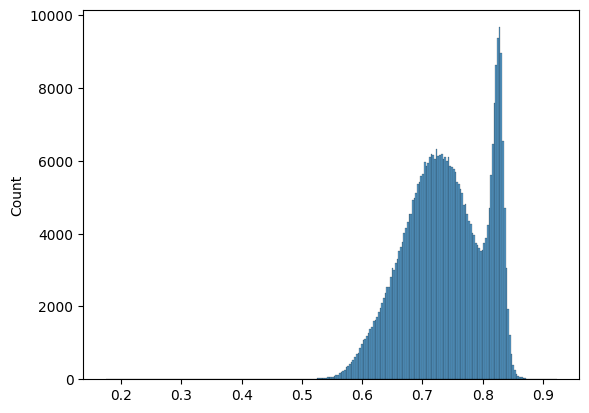

In [48]:
sns.histplot(df[[c for c in df if c.startswith('agg_')]].apply(lambda x: np.mean(x), axis=1))

<Axes: xlabel='overall_score', ylabel='Count'>

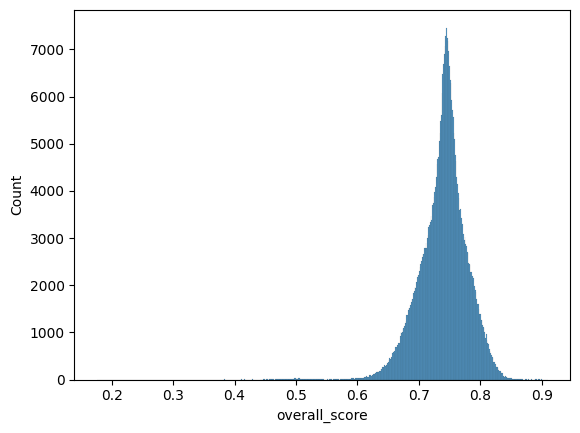

In [49]:
sns.histplot(df.overall_score)

In [ ]:
df['overall_score'] = df[[c for c in df if c.startswith('agg_')]].apply(lambda x: np.mean(x), axis=1)

In [55]:
from statsmodels.api import OLS
from statsmodels.tools.tools import add_constant

vars_to_drop = ['lda_topic9', 'model_gpt-3.5-turbo-0613',
                'llm_model_wildchat_subset_en_100k_Llama-3.1-70B.jsonl', 'prompt_Prompt_11',
                'subregion_United States', 'category_writing',
                'human_turn_1_readability','ai_turn_2_readability',
               ]
df_vif = pd.get_dummies(df1, dtype='int')
df_vif = df_vif.drop([x for x in vars_to_drop if x in df_vif.columns], axis=1).dropna()
df_vif.toxic = df_vif.toxic.apply(lambda x: 1 if x else 0)
min_score = min(df_vif.overall_score)
max_score = max(df_vif.overall_score)
df_vif.overall_score = (df_vif.overall_score - min_score) / (max_score - min_score)
for c in df_vif.columns:
    if len(Counter(df_vif[c]))<=1:
        df_vif = df_vif.drop([c], axis=1)
        print('removed',c)
df_vif = add_constant(df_vif)


X = df_vif.drop(['overall_score'], axis=1)
y = df_vif['overall_score']
mod = OLS(y, X)

res = mod.fit()

res.summary(alpha=0.05/X.shape[1])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          overall_score   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     355.8
Date:                Sun, 11 Aug 2024   Prob (F-statistic):               0.00
Time:                        20:44:17   Log-Likelihood:             5.9824e+05
No. Observations:              379179   AIC:                        -1.196e+06
Df Residuals:                  379066   BIC:                        -1.195e+06
Df Model:                         112                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================================================
                                                                                coef    std err          t      P>|t| [0.00022123893805309737 0.9997787610619469]
-----------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                         0.7757      0.003    229.021      0.000                   0.764               0.788
turn                                                                          0.0002    1.5e-05     15.757      0.000                   0.000               0.000
toxic                                                                        -0.0046      0.000    -18.945      0.000                  -0.005              -0.004
topic0                                                                       -0.0036      0.002     -2.157      0.031                  -0.010               0.002
topic1                                                                        0.0054      0.001      5.860      0.000                   0.002               0.009
topic2                                                                       -0.0074      0.001     -7.630      0.000                  -0.011              -0.004
topic3                                                                        0.0147      0.002      6.543      0.000                   0.007               0.023
topic4                                                                       -0.0258      0.003     -8.249      0.000                  -0.037              -0.015
topic5                                                                        0.0023      0.001      2.994      0.003                  -0.000               0.005
topic6                                                                       -0.0134      0.001    -17.846      0.000                  -0.016              -0.011
topic7                                                                        0.0104      0.003      4.042      0.000                   0.001               0.019
topic8                                                                       -0.0013      0.005     -0.241      0.810                  -0.020               0.017
topic10                                                                       0.0015      0.002      0.996      0.319                  -0.004               0.007
topic11                                                                      -0.0164      0.001    -11.659      0.000                  -0.021              -0.011
topic12                                                                      -0.0102      0.003     -3.152      0.002                  -0.021               0.001
topic13                                                                      -0.0020      0.002     -1.294      0.196                  -0.008               0.003
topic

<Axes: xlabel='cat_multilingual', ylabel='Count'>

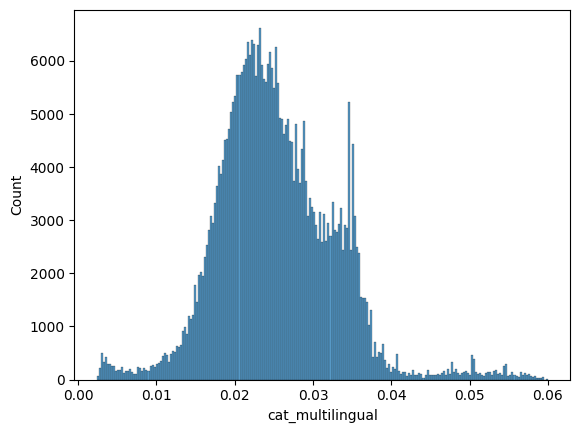

In [56]:
sns.histplot(df_vif.cat_multilingual)